In [1]:
#Importing the library
import pandas as pd
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
import os
import seaborn as sns

In [2]:
#Loading the dataset
DATASET=r"C:\Users\admin\OneDrive\Documents\Leaf\images\tomato\train"
DATASET2=r"C:\Users\admin\OneDrive\Documents\Leaf\images\tomato\val"


In [3]:
CATEGORIES=["Tomato___Bacterial_spot",
            "Tomato___Early_blight",
            "Tomato___healthy",
            "Tomato___Late_blight",
            "Tomato___Leaf_Mold",
            "Tomato___Septoria_leaf_spot",
            "Tomato___Spider_mites Two-spotted_spider_mite",
            "Tomato___Target_Spot",
            "Tomato___Tomato_mosaic_virus",
            "Tomato___Tomato_Yellow_Leaf_Curl_Virus"]


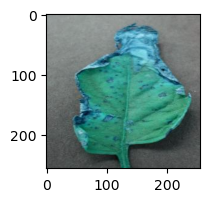

In [4]:
#Displaying the sample images from the dataset
import cv2 as cv
import matplotlib.pyplot as plt
image1=cv.imread(r"C:\Users\admin\OneDrive\Documents\Leaf\images\tomato\train\Tomato___Bacterial_spot\371929a8-17b8-4077-94f4-cfb6963d9285___UF.GRC_BS_Lab Leaf 8624.JPG")
plt.figure(figsize=(5,2))
plt.imshow(image1)
plt.show()

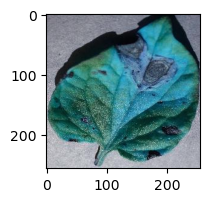

In [5]:
import cv2 as cv
import matplotlib.pyplot as plt
image2 =cv.imread(r"C:\Users\admin\OneDrive\Documents\Leaf\images\tomato\train\Tomato___Early_blight\5b86ab6a-3823-4886-85fd-02190898563c___RS_Erly.B 8452.JPG")
plt.figure(figsize=(5,2))
plt.imshow(image2)
plt.show()

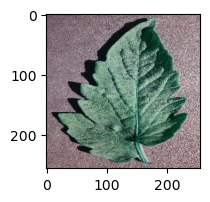

In [6]:
image3=cv.imread(r"C:\Users\admin\OneDrive\Documents\Leaf\images\tomato\train\Tomato___healthy\95abb641-4435-4531-88f6-a4a597c5ff33___RS_HL 9779.JPG")
plt.figure(figsize=(5,2))
plt.imshow(image3)
plt.show()

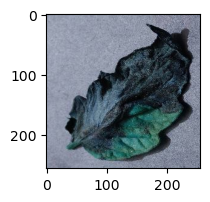

In [7]:
image4=cv.imread(r"C:\Users\admin\OneDrive\Documents\Leaf\images\tomato\train\Tomato___Late_blight\7538ba25-b6c3-4aca-a3d5-68ab173c93eb___RS_Late.B 5436.JPG")
plt.figure(figsize=(5,2))
plt.imshow(image4)
plt.show()

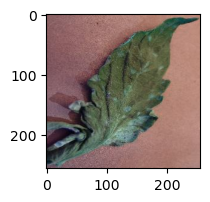

In [8]:
image5=cv.imread(r"C:\Users\admin\OneDrive\Documents\Leaf\images\tomato\train\Tomato___Leaf_Mold\9ff27ae7-aa02-4fc3-b83d-29e3debb45cb___Crnl_L.Mold 9049.JPG")
plt.figure(figsize=(5,2))
plt.imshow(image5)
plt.show()

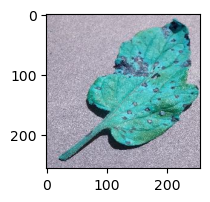

In [9]:
image6=cv.imread(r"C:\Users\admin\OneDrive\Documents\Leaf\images\tomato\train\Tomato___Septoria_leaf_spot\720cc0eb-fccf-4e33-8f75-c834b6297b86___Matt.S_CG 6771.JPG")
plt.figure(figsize=(5,2))
plt.imshow(image6)
plt.show()

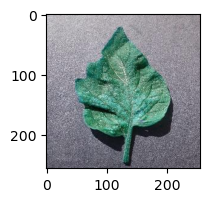

In [10]:
image7=cv.imread(r"C:\Users\admin\OneDrive\Documents\Leaf\images\tomato\train\Tomato___Spider_mites Two-spotted_spider_mite\2305cbc5-4e95-4258-810d-e68e7a58b6f2___Com.G_SpM_FL 1454.JPG")
plt.figure(figsize=(5,2))
plt.imshow(image7)
plt.show()

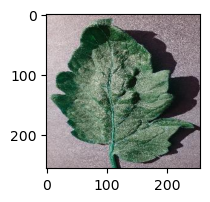

In [11]:
image8=cv.imread(r"C:\Users\admin\OneDrive\Documents\Leaf\images\tomato\train\Tomato___Target_Spot\68cb6347-4fb9-42e8-8620-837a3c9d44b3___Com.G_TgS_FL 0751.JPG")
plt.figure(figsize=(5,2))
plt.imshow(image8)
plt.show()

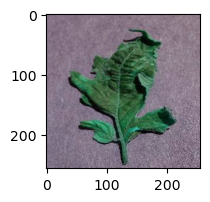

In [12]:
image9=cv.imread(r"C:\Users\admin\OneDrive\Documents\Leaf\images\tomato\train\Tomato___Tomato_mosaic_virus\146eaf68-7f61-4717-ac81-2f8bb4533fec___PSU_CG 2406.JPG")
plt.figure(figsize=(5,2))
plt.imshow(image9)
plt.show()

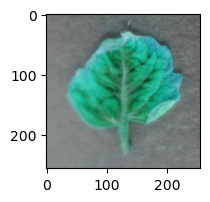

In [13]:
image10=cv.imread(r"C:\Users\admin\OneDrive\Documents\Leaf\images\tomato\train\Tomato___Tomato_Yellow_Leaf_Curl_Virus\d6b55fa6-edef-43f8-85ff-a225488fd50c___UF.GRC_YLCV_Lab 02886.JPG")
plt.figure(figsize=(5,2))
plt.imshow(image10)
plt.show()

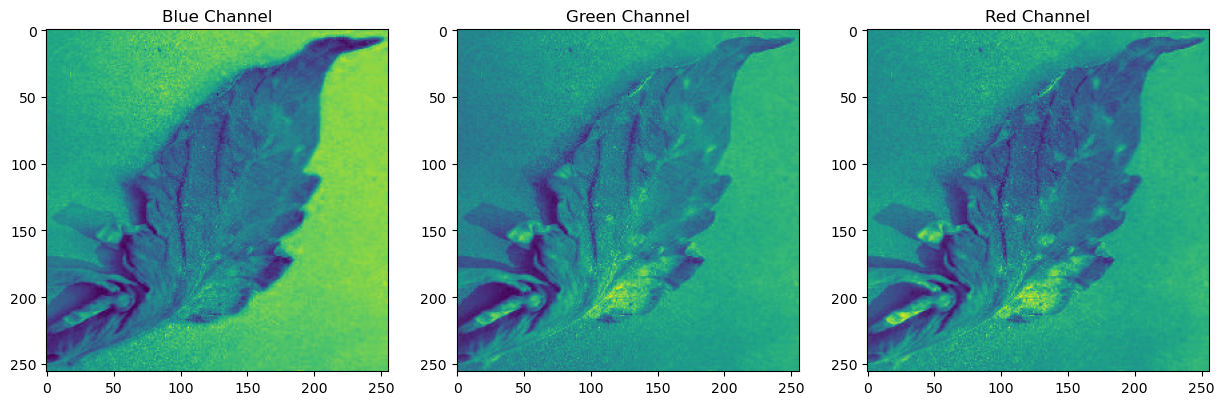

In [14]:
#Spilitting into channels 
blue,green,red = cv.split(image5)
# Plotting the images
fig = plt.figure(figsize = (15, 7.2)) 
fig.add_subplot(131)
plt.title("Blue Channel")
plt.imshow(blue)
fig.add_subplot(132)
plt.title("Green Channel")
plt.imshow(green)
fig.add_subplot(133)
plt.title("Red Channel")
plt.imshow(red)
plt.show()

In [15]:
df_blue = blue/255
df_green = green/255
df_red = red/255

In [16]:
# Preprocessing Using PCA
from sklearn.decomposition import PCA
pca_b = PCA(n_components=50)
pca_b.fit(df_blue)
trans_pca_b = pca_b.transform(df_blue)
pca_g = PCA(n_components=50)
pca_g.fit(df_green)
trans_pca_g = pca_g.transform(df_green)
pca_r = PCA(n_components=50)
pca_r.fit(df_red)
trans_pca_r = pca_r.transform(df_red)


In [17]:
#Decompose the Image data 

print(trans_pca_b.shape)
print(trans_pca_r.shape)
print(trans_pca_g.shape)


(256, 50)
(256, 50)
(256, 50)


In [18]:

#Fitting the train_data
train_data=[]

for category in CATEGORIES:
        label=CATEGORIES.index(category)
        path=os.path.join(DATASET,category)
        for img_file in os.listdir(path):
            img=cv.imread(os.path.join(path,img_file),6)
            img=cv.cvtColor(img,cv.COLOR_BGR2RGB)
            img=cv.resize(img,(64,64))            
            train_data.append([img,label])

In [19]:
#Fitting the test_data
import os
test_data=[]

for category in CATEGORIES:
        label=CATEGORIES.index(category)
        path=os.path.join(DATASET2,category)
        for img_file in os.listdir(path):
            img=cv.imread(os.path.join(path,img_file),6)
            img=cv.cvtColor(img,cv.COLOR_BGR2RGB)
            img=cv.resize(img,(64,64))
            test_data.append([img,label])


In [20]:
#Showing the shape of the train and test data 
print(len(train_data))
print(len(test_data))


10000
1000


In [21]:
#Shuffling the data
import random

random.shuffle(train_data)
random.shuffle(test_data)

In [22]:
#Splitting the train_data 
X_train=[]
y_train=[]

In [23]:
#Fitting the features and labels to the train_data 
for features,label in train_data:
    X_train.append(features)
    y_train.append(label)

In [24]:
Y=[]
for i in y_train:
    if i==0:
        Y.append("BACTERIAL SPOT")
    elif i==1:
        Y.append("EARLY BLIGHT")
    elif i==2:
        Y.append("HEALTHY")
    elif i==3:
        Y.append("LATE BLIGHT")
    elif i==4:
        Y.append("LEAF MOLD")
    elif i==5:
        Y.append("SEPTORIA LEAF SPOT")
    elif i==6:
        Y.append("SPIDER MITE")
    elif i==7:
        Y.append("TARGET SPOT")
    elif i==8:
        Y.append("MOSAIC VIRUS")
    else:
        Y.append("YELLOW LEAF CURL VIRUS")

len(X_train),len(y_train)


(10000, 10000)

In [25]:
#Splitting the test_data
X_test=[]
y_test=[]

In [26]:
#Fitting the features and labels to the test_data
for features,label in test_data:
    X_test.append(features)
    y_test.append(label)

In [27]:
Z=[]
for i in y_test:
    if i==0:
        Z.append("BACTERIAL SPOT")
    elif i==1:
        Z.append("EARLY BLIGHT")
    elif i==2:
        Z.append("HEALTHY")
    elif i==3:
        Z.append("LATE BLIGHT")
    elif i==4:
        Z.append("LEAF MOLD")
    elif i==5:
        Z.append("SEPTORIA LEAF SPOT")
    elif i==6:
        Z.append("SPIDER MITE")
    elif i==7:
        Z.append("TARGET SPOT")
    elif i==8:
        Z.append("MOSAIC VIRUS")
    else:
        Z.append("YELLOW LEAF CURL VIRUS")

len(X_test),len(y_test)


(1000, 1000)

In [28]:
#Resizing the X_train images
X_train=np.array(X_train).reshape(-1,64,64,3)
X_train=X_train/255.0
X_train.shape

(10000, 64, 64, 3)

In [29]:
#Resizing the X_test images
X_test=np.array(X_test).reshape(-1,64,64,3)
X_test=X_test/255.0
X_test.shape

(1000, 64, 64, 3)

In [30]:
#Visualize the image count
order=['BACTERIAL SPOT',
       'EARLY BLIGHT',
       'HEALTHY',
       'LATE BLIGHT',
       'LEAF MOLD',
       'SEPTORIA LEAF SPOT',
       'SPIDER MITE',
       'TARGET SPOT',
       'MOSAIC VIRUS',
       'YELLOW LEAF CURL VIRUS']

In [31]:
#convert the vector of class to the matrix of binary class(0,1) 
from keras.utils import to_categorical
one_hot_train=to_categorical(y_train)
one_hot_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [32]:
one_hot_test=to_categorical(y_test)
one_hot_test

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [33]:
#Model building 
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,Dense,Flatten,MaxPooling2D,Dropout


In [34]:
#Buildig the model architecture
#CNN with softmax activation layer in last output layer
classifier=Sequential()

classifier.add(Conv2D(32,(3,3), input_shape=(64,64,3), activation='relu'))
classifier.add(MaxPooling2D(pool_size=(2,2)))
classifier.add(Dropout(0.2))

classifier.add(Conv2D(64,(3,3), activation='relu'))
classifier.add(MaxPooling2D(pool_size=(2,2)))
classifier.add(Dropout(0.2))

classifier.add(Conv2D(128,(3,3), activation='relu'))
classifier.add(MaxPooling2D(pool_size=(2,2)))
classifier.add(Dropout(0.4))

classifier.add(Flatten())

classifier.add(Dense(activation='relu', units=64))
classifier.add(Dense(activation='relu', units=128))
classifier.add(Dense(activation='relu', units=64))
classifier.add(Dense(activation='softmax', units=10))

classifier.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

classifier.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 31, 31, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 31, 31, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 29, 29, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 14, 14, 64)       0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 14, 14, 64)        0

In [35]:
#Fitting the Model
history=classifier.fit(X_train,one_hot_train,epochs=50,batch_size=128,validation_split=0.2)

Epoch 1/50
63/63 [==============================] - 66s 994ms/step - loss: 2.0665 - accuracy: 0.2239 - val_loss: 1.7005 - val_accuracy: 0.3840
Epoch 2/50
63/63 [==============================] - 62s 987ms/step - loss: 1.4926 - accuracy: 0.4737 - val_loss: 1.5205 - val_accuracy: 0.4580
Epoch 3/50
63/63 [==============================] - 60s 955ms/step - loss: 1.1376 - accuracy: 0.6084 - val_loss: 1.0221 - val_accuracy: 0.6485
Epoch 4/50
63/63 [==============================] - 61s 961ms/step - loss: 0.9335 - accuracy: 0.6765 - val_loss: 0.8089 - val_accuracy: 0.7270
Epoch 5/50
63/63 [==============================] - 62s 984ms/step - loss: 0.7387 - accuracy: 0.7412 - val_loss: 0.6390 - val_accuracy: 0.7905
Epoch 6/50
63/63 [==============================] - 61s 975ms/step - loss: 0.6224 - accuracy: 0.7800 - val_loss: 0.6300 - val_accuracy: 0.7855
Epoch 7/50
63/63 [==============================] - 63s 996ms/step - loss: 0.5562 - accuracy: 0.8074 - val_loss: 0.5280 - val_accuracy: 0.8210

In [36]:
test_loss,test_acc=classifier.evaluate(X_test,one_hot_test)
test_loss,test_acc

32/32 [==============================] - 1s 42ms/step - loss: 0.2867 - accuracy: 0.9270


(0.28672438859939575, 0.9269999861717224)

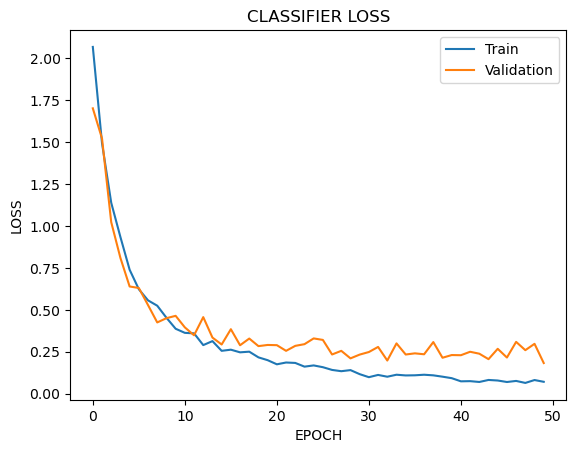

In [37]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('CLASSIFIER LOSS')
plt.ylabel('LOSS')
plt.xlabel('EPOCH')
plt.legend(['Train','Validation'],loc='upper right')
plt.show()


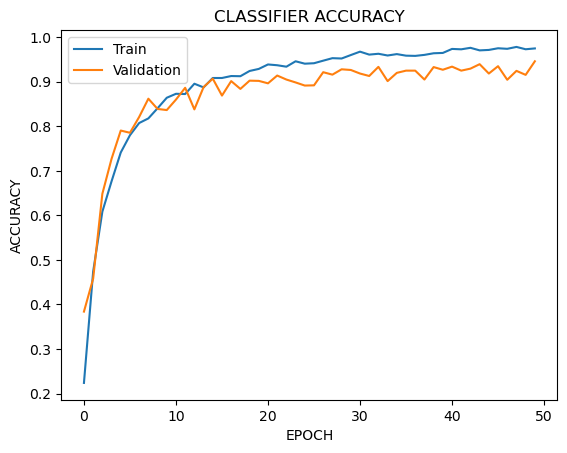

In [38]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('CLASSIFIER ACCURACY')
plt.ylabel('ACCURACY')
plt.xlabel('EPOCH')
plt.legend(['Train','Validation'],loc='upper left')
plt.show()